## Data Preparation: Demographic and Health Survey (DHS) 

- Download Burundi 2010 [DHS](https://dhsprogram.com/What-We-Do/Survey-Types/DHS.cfm) data (Household Recode and HIV dataset)
- Construct cluster-level aggregates


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### File path

In [2]:
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone2/data/'              
dhs_dict_file  = path+'DHS/BUHR61FL.DO' # DHS data dictionary (use as column name)
dhs_file = path+'DHS/BUHR61FL.DTA'  # household record data
dhs_hiv_file = path+'DHS/BUAR61FL.DTA' # HIV data

### Help function

In [4]:
def get_dhs_dict(dhs_dict_file):
    '''
    help function to read 
    '''
    dhs_dict = dict()
    with open(dhs_dict_file, 'r', errors='replace') as file:
        line = file.readline()
        while line:
            line = file.readline()
            if 'label variable' in line:
                code = line.split()[2]
                colname = ' '.join([x.strip('"') for x in line.split()[3:]])
                dhs_dict[code] = colname
    return dhs_dict

### Load DHS dataset

In [8]:
dhs = pd.read_stata(dhs_file, convert_categoricals=False)
dhs_dict = get_dhs_dict(dhs_dict_file)
# use dhs_dict_file as column names
dhs = dhs.rename(columns=dhs_dict).dropna(axis=1)
print('Data Dimensions: {}'.format(dhs.shape))

Data Dimensions: (8596, 172)


In [10]:
# list column name
dhs.columns.to_list()

['Case Identification',
 'Country code and phase',
 'Cluster number',
 'Household number',
 "Respondent's line number (answering Household questionnaire)",
 'Ultimate area unit',
 'Household sample weight (6 decimals)',
 'Month of interview',
 'Year of interview',
 'Date of interview (CMC)',
 'Number of household members',
 'Number of eligible women in household',
 'Number of eligible men in household',
 'Number of de jure members',
 'Number of de facto members',
 'Number of children 5 and under (de jure)',
 'Result of household interview',
 'Day of interview',
 'Number of visits',
 'Interviewer identification',
 'Keyer identification',
 'Ever-married sample',
 'Primary sampling unit',
 'Sample strata for sampling errors',
 'Stratification used in sample design',
 'Region',
 'Type of place of residence',
 'Household selected for male interview',
 'Household weight for male subsample (6 decimals)',
 'Field supervisor',
 'Field editor',
 'Office editor',
 'Number of eligible children for

### Data Cleaning

In [11]:
# select columns
data_dhs = dhs[[
    'Cluster number',
    'Time to get to water source (minutes)',
    'Has electricity',
    'Has mobile telephone',
    'Wealth index factor score (5 decimals)',
    'Education completed in single years']]

In [12]:
#check missing value
data_dhs.isnull().sum()

Cluster number                            0
Time to get to water source (minutes)     0
Has electricity                           0
Has mobile telephone                      0
Wealth index factor score (5 decimals)    0
Education completed in single years       0
dtype: int64

In [13]:
# rescale
data_dhs['Wealth index factor score (5 decimals)'] = data_dhs['Wealth index factor score (5 decimals)']/100000

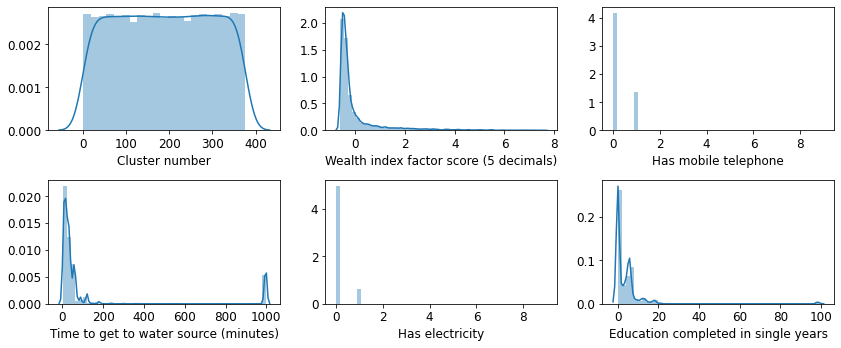

In [15]:
# exploratoru data analysis & check outliers
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(2, 3, sharex=False, figsize=(12,5))
sns.distplot(data_dhs[['Cluster number']],ax=ax[0][0])
ax[0][0].set_xlabel('Cluster number')
sns.distplot(data_dhs[['Wealth index factor score (5 decimals)']],ax=ax[0][1])
ax[0][1].set_xlabel('Wealth index factor score (5 decimals)')
sns.distplot(data_dhs[['Has mobile telephone']],ax=ax[0][2])
ax[0][2].set_xlabel('Has mobile telephone')
sns.distplot(data_dhs[['Time to get to water source (minutes)']],ax=ax[1][0])
ax[1][0].set_xlabel('Time to get to water source (minutes)')
sns.distplot(data_dhs[['Has electricity']],ax=ax[1][1])
ax[1][1].set_xlabel('Has electricity')
sns.distplot(data_dhs[['Education completed in single years']],ax=ax[1][2])
ax[1][2].set_xlabel('Education completed in single years')
plt.tight_layout()

- 'Has mobile telephone' and 'Has electricity' only have 0 and 1.
- 'Wealth index factor score' is not normal distribution.
- 'Time to get water source' has outlier at 1000.

In [16]:
data_dhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8596 entries, 0 to 8595
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cluster number                          8596 non-null   int16  
 1   Time to get to water source (minutes)   8596 non-null   int16  
 2   Has electricity                         8596 non-null   int8   
 3   Has mobile telephone                    8596 non-null   int8   
 4   Wealth index factor score (5 decimals)  8596 non-null   float64
 5   Education completed in single years     8596 non-null   int8   
dtypes: float64(1), int16(2), int8(3)
memory usage: 193.1 KB


In [17]:
data_dhs_clean = data_dhs.copy()
# keep 'Access to electricity' as 0 or 1
data_dhs_clean = data_dhs[data_dhs['Has electricity'] !=9]
# keep 'Has mobile telephone' as 0 or 1
data_dhs_clean = data_dhs[data_dhs['Has mobile telephone'] !=9]

# keep 'Has mobile telephone' as 0 or 1
data_dhs_clean = data_dhs[data_dhs['Time to get to water source (minutes)'] <=900]

data_dhs_clean.dropna(inplace=True)

In [19]:
data_dhs_clean.describe()

,Cluster number,Time to get to water source (minutes),Has electricity,Has mobile telephone,Wealth index factor score (5 decimals),Education completed in single years
count,7686.000000,7686.000000,7686.000000,7686.000000,7686.000000,7686.000000
mean,189.559849,32.809264,0.045928,0.186313,-0.239455,3.199193
std,107.935208,32.696050,0.383252,0.423942,0.503599,9.166032
min,1.000000,1.000000,0.000000,0.000000,-0.612990,0.000000
25%,97.000000,10.000000,0.000000,0.000000,-0.500505,0.000000
50%,190.000000,25.000000,0.000000,0.000000,-0.398590,0.000000
75%,281.750000,40.000000,0.000000,0.000000,-0.214167,5.000000
max,376.000000,600.000000,9.000000,9.000000,7.311660,99.000000


### Groupby with cluster

In [20]:
# group by cluster with sum
data_dhs_cluster_1 = data_dhs_clean[[
    'Cluster number',
    'Time to get to water source (minutes)',
    'Has electricity',
     'Has mobile telephone',
    'Education completed in single years']].groupby(['Cluster number']).sum().reset_index()

In [21]:
# group by cluster with median value
data_dhs_cluster_2 = data_dhs_clean[[
    'Cluster number',
    'Wealth index factor score (5 decimals)']].groupby('Cluster number').median().reset_index()

In [22]:
# merge two datasets
data_dhs_cluster = data_dhs_cluster_1.merge(data_dhs_cluster_2, left_on='Cluster number', right_on='Cluster number')

In [23]:
data_dhs_cluster.head()

,Cluster number,Time to get to water source (minutes),Has electricity,Has mobile telephone,Education completed in single years,Wealth index factor score (5 decimals)
0,1,70,6.0,5.0,29.0,0.604660
1,2,535,0.0,3.0,33.0,-0.437740
2,3,372,0.0,2.0,32.0,-0.356630
3,4,802,1.0,1.0,24.0,-0.444145
4,5,801,0.0,2.0,29.0,-0.498495


In [24]:
# rename the columns
data_dhs_cluster.columns = [
    'Cluster',
    'Access to water',
    'Access to electricity',
    'Acess to cellphone',
    'Education completed',
    'Wealth Index Factor Score']

In [25]:
data_dhs_cluster.describe()

,Cluster,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,190.490463,687.117166,0.961853,3.901907,67.000000,-0.203252
std,108.408705,480.072934,2.865599,3.878788,54.609643,0.641283
min,1.000000,2.000000,0.000000,0.000000,0.000000,-0.561870
25%,97.500000,453.000000,0.000000,1.000000,34.000000,-0.454863
50%,192.000000,606.000000,0.000000,3.000000,50.000000,-0.402330
75%,283.500000,821.500000,0.000000,5.000000,77.000000,-0.305723
max,376.000000,4405.000000,20.000000,21.000000,509.000000,6.672330


### Get HIV data

In [26]:
dhs_hiv = pd.read_stata(dhs_hiv_file, convert_categoricals=False)

In [27]:
df_hiv = dhs_hiv[['hivclust', 'hiv03']]
df_hiv.columns= ['Cluster', 'hiv blood test result']

In [28]:
df_hiv_cluster = df_hiv.groupby('Cluster').sum().reset_index()

### Merge with GPS data

In [30]:
cluster_file = path+'DHS/BU_clusters_location.csv'  # GPS dataset
df_location = pd.read_csv(cluster_file)[['DHSCLUST', 'LATNUM', 'LONGNUM']]

In [33]:
df_location.columns =['Cluster', 'latitude', 'longitude']
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cluster    376 non-null    float64
 1   latitude   376 non-null    float64
 2   longitude  376 non-null    float64
dtypes: float64(3)
memory usage: 8.9 KB


In [34]:
# merge DHS, HIV, and GPS data
df_cluster = data_dhs_cluster.merge(df_hiv_cluster, how='inner', left_on='Cluster',right_on='Cluster' )
df_cluster = df_cluster.merge(df_location, how='inner', left_on='Cluster',right_on='Cluster')

In [35]:
df_cluster.head()

,Cluster,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score,hiv blood test result,latitude,longitude
0,1,70,6.0,5.0,29.0,0.604660,1,-3.368500,29.362186
1,2,535,0.0,3.0,33.0,-0.437740,0,-3.816132,29.963905
2,3,372,0.0,2.0,32.0,-0.356630,1,-2.505578,30.258659
3,4,802,1.0,1.0,24.0,-0.444145,0,-3.428142,30.257026
4,5,801,0.0,2.0,29.0,-0.498495,0,-3.758130,30.310477


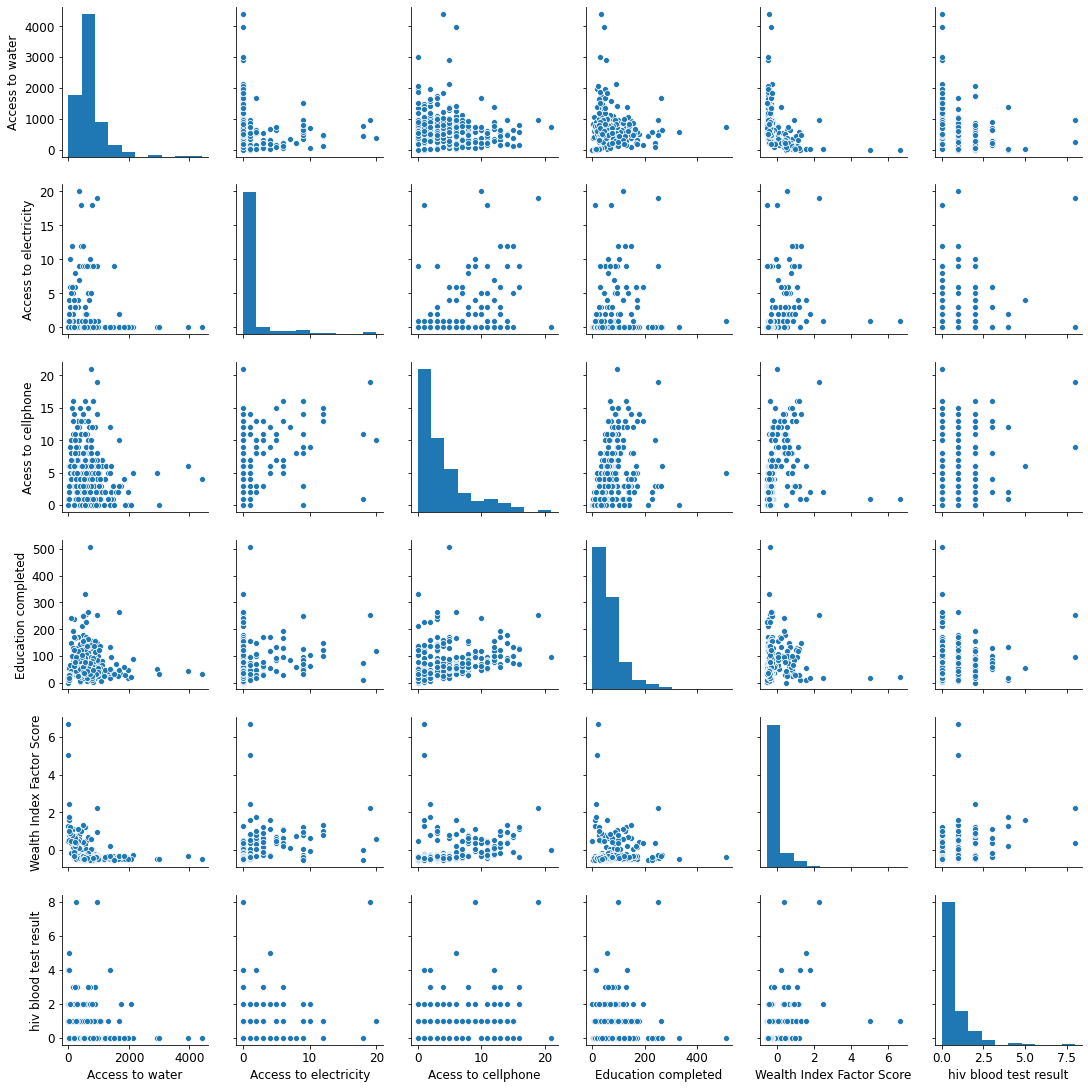

In [36]:
sns.pairplot(df_cluster.iloc[:,1:7])

In [37]:
df_cluster.to_csv( path+'DHS/DHS_data.csv', index=False)